# Introduction

Hello everyone! I'm Camilo Alegre, new to Kaggle and the data analysis industry. In this project, I worked with data on ibuprofen prices in Peru's private sector, focusing on cleaning and transforming the information to facilitate analysis through presentations.
I'm excited to learn and collaborate with this community.

Contact: https://www.linkedin.com/in/camiloalegre11/

I look forward to connecting and learning from all of you!

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import time as tm
import matplotlib.pyplot as plt
import time

from wordcloud import WordCloud

import warnings
warnings.simplefilter('ignore')



# Cleaning Data

In this section, I imported the data from an Excel file, specifying the starting row for the relevant information. I excluded data that was not pertinent to the analysis, such as records from the public sector. Additionally, I renamed certain entries to make them more concise and easier to read. 

Next, I converted a specific column to a datetime format, which allowed me to generate two new columns: one for the date and another for the time. These new columns will be particularly useful for the subsequent analysis. Lastly, I renamed the columns from Spanish to English to make the dataset more accessible to an English-speaking audience.


In [2]:
ibuprofen_filepath = "/kaggle/input/ibuprofen-price-in-per-minsa/preciosProductos.xlsx"
ibuprofen_data= pd.read_excel(ibuprofen_filepath,header=7)

# Exclude the public type data
ibuprofen_data = ibuprofen_data[ibuprofen_data['Tipo'] != 'Público']

# Rename one of the manufacturer's data to a shorter one
ibuprofen_data['Fabricante'] = ibuprofen_data['Fabricante'].str.replace('SOCIEDAD ANONIMA CERRADA', 'S.A.C.')

# Replace the word 'BOTICA' with an empty string
ibuprofen_data['Farmacia/Botica'] = ibuprofen_data['Farmacia/Botica'].str.replace(r'\bBOTICA(S)?\b', '', regex=True).str.strip()
ibuprofen_data['Nombre de producto'] = ibuprofen_data['Nombre de producto'].str.replace(' 600  mg Tableta Recubierta', '').str.strip()
ibuprofen_data['Nombre de producto'] = ibuprofen_data['Nombre de producto'].str.replace('600 mg Tableta Recubierta', '').str.strip()

# Convert the 'Fecha de Actualizac.' column to a datetime format.
ibuprofen_data['Fecha de Actualizac.'] = pd.to_datetime(ibuprofen_data['Fecha de Actualizac.'], format='%d/%m/%Y %I:%M:%S %p')

# Create new columns with their respective format.
ibuprofen_data['Fecha'] = ibuprofen_data['Fecha de Actualizac.'].dt.strftime('%d/%m/%Y')
ibuprofen_data['Hora'] = ibuprofen_data['Fecha de Actualizac.'].dt.strftime('%H:%M:%S')
ibuprofen_data = ibuprofen_data.sort_values(['Fecha', 'Hora'])

# Delete the 'Fecha de Actualizac.', 'Teléfono', and 'Dirección' columns
ibuprofen_data = ibuprofen_data.drop(columns=['Teléfono','Dirección'])
ibuprofen_data.drop(columns=['Fecha de Actualizac.'], inplace=True)

# Reorganize the new columns so that they are at the beginning of the dataframe.
ibuprofen_data = ibuprofen_data[['Fecha', 'Hora'] + [col for col in ibuprofen_data.columns if col not in ['Fecha', 'Hora']]]

#  Renaming columns (spanish -> english)
rename_names_dic = {
    'Fecha': 'Date',
    'Hora': 'Hour',
    'Tipo': 'Type',
    'Departamento': 'Region',
    'Provincia': 'Province',
    'Distrito': 'District',
    'Nombre de producto': 'Product',
    'Precio Unit.': 'Unit Price',
    'Farmacia/Botica': 'Pharmacy',
    'Fabricante': 'Manufacturer',
    'Titular': 'Holder',
}    
ibuprofen_data = ibuprofen_data.rename(columns=rename_names_dic)
ibuprofen_data.head()   
ibuprofen_data

,Date,Hour,Type,Product,Holder,Manufacturer,Pharmacy,Unit Price,Region,Province,District
2501,01/04/2024,09:11:49,Privado,DOLOFOR 600 DOL,DISTRIBUIDORA CONTINENTAL 6 S.A.,MEDROCK CORPORATION S.A.C.,A&F,1.20,LIMA,LIMA,VILLA MARIA DEL TRIUNFO
2500,01/04/2024,09:45:59,Privado,DOLOFOR 600 DOL,DISTRIBUIDORA CONTINENTAL 6 S.A.,MEDROCK CORPORATION S.A.C.,A&F,1.20,LIMA,LIMA,VILLA MARIA DEL TRIUNFO
2565,01/04/2024,10:33:17,Privado,FLAMADOL,BIOS PERU S.A.C.,CIFARMA S.A.C.,PALERMO,1.50,LA LIBERTAD,TRUJILLO,TRUJILLO
1716,01/04/2024,13:00:14,Privado,DOLOFOR 600 DOL,DISTRIBUIDORA CONTINENTAL 6 S.A.,MEDROCK CORPORATION S.A.C.,JOSE MARIA,1.00,CALLAO,CALLAO,LA PERLA
43,01/04/2024,17:16:17,Privado,IBUPROFENO,LABORATORIOS INDUQUIMICA S.A.,LABORATORIOS INDUQUIMICA S.A.,FARMACIA ISIS,0.46,LA LIBERTAD,TRUJILLO,TRUJILLO
...,...,...,...,...,...,...,...,...,...,...,...
2514,30/04/2024,22:01:32,Privado,DOLOFOR 600 DOL,DISTRIBUIDORA CONTINENTAL 6 S.A.,MEDROCK CORPORATION S.A.C.,BIENESTAR SUR,1.50,LIMA,LIMA,VILLA MARIA DEL TRIUNFO
2575,30/04/2024,22:12:29,Privado,DOLOFOR 600 DOL,DISTRIBUIDORA CONTINENTAL 6 S.A.,MEDROCK CORPORATION S.A.C.,FARMASHOP,2.00,LIMA,LIMA,LIMA
2574,30/04/2024,22:12:39,Privado,DOLOFOR 600 DOL,DISTRIBUIDORA CONTINENTAL 6 S.A.,MEDROCK CORPORATION S.A.C.,FARMASHOP,2.00,LIMA,LIMA,LIMA
1670,30/04/2024,23:32:53,Privado,DOLOFOR 600 DOL,FARMACEUTICA CONTINENTAL E.I.R.L.,MEDROCK CORPORATION S.A.C.,NEWFARMA,1.00,LIMA,LIMA,SANTIAGO DE SURCO


**Group by Region and Manufacturer**

In [3]:
# Group by Region and Manufacturer, and count how many times each manufacturer appears
manufacturer_per_region = ibuprofen_data.groupby(['Region', 'Manufacturer']).size().unstack(fill_value=0)

manufacturer_per_region


Manufacturer,CIFARMA S.A.C.,FARMINDUSTRIA,INSTITUTO QUIMIOTERAPICO S.A.,LABORATORIOS INDUQUIMICA S.A.,MEDROCK CORPORATION S.A.C.
Region,,,,,
AMAZONAS,0,0,0,0,11
ANCASH,20,12,1,6,67
APURIMAC,3,0,0,1,13
AREQUIPA,4,0,0,1,130
AYACUCHO,0,0,0,0,25
CAJAMARCA,1,0,0,2,69
CALLAO,0,1,0,0,72
CUSCO,1,0,0,2,65
HUANCAVELICA,0,0,0,4,7


# Which ibuprofen manufacturer has the highest unit price?

Text(0, 0.5, 'Unit price')

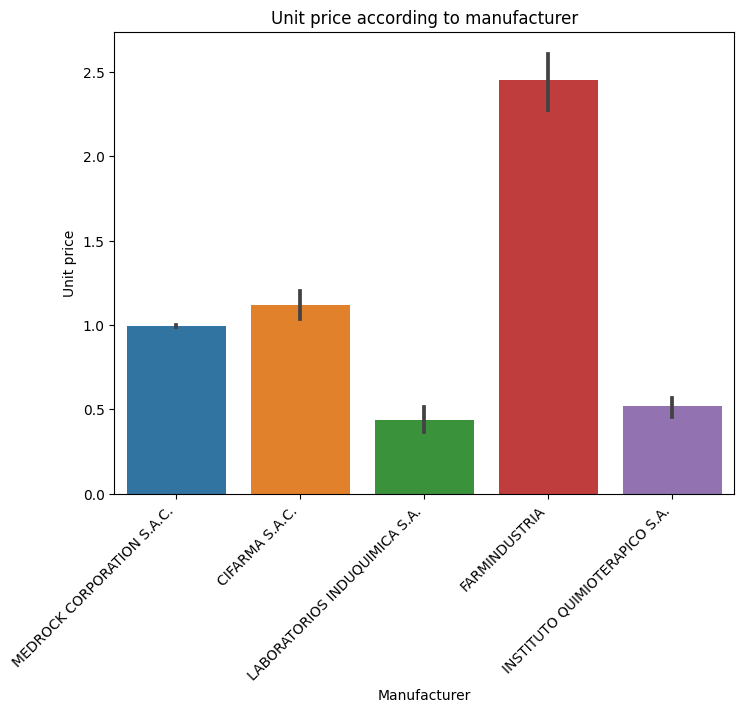

In [4]:
# Setting the graph size
plt.figure(figsize=(8,6))

# Adding title
plt.title("Unit price according to manufacturer")

# Setting data for bar chart
sns.barplot(x=ibuprofen_data['Manufacturer'], y=ibuprofen_data['Unit Price'])

# Rotating X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding subtitle to Y axis
plt.ylabel("Unit price")

# What is the distribution of unit prices for each manufacturer?

A violin plot allows us to compare the distribution of prices by manufacturer, showing both the median and the density of the price data.

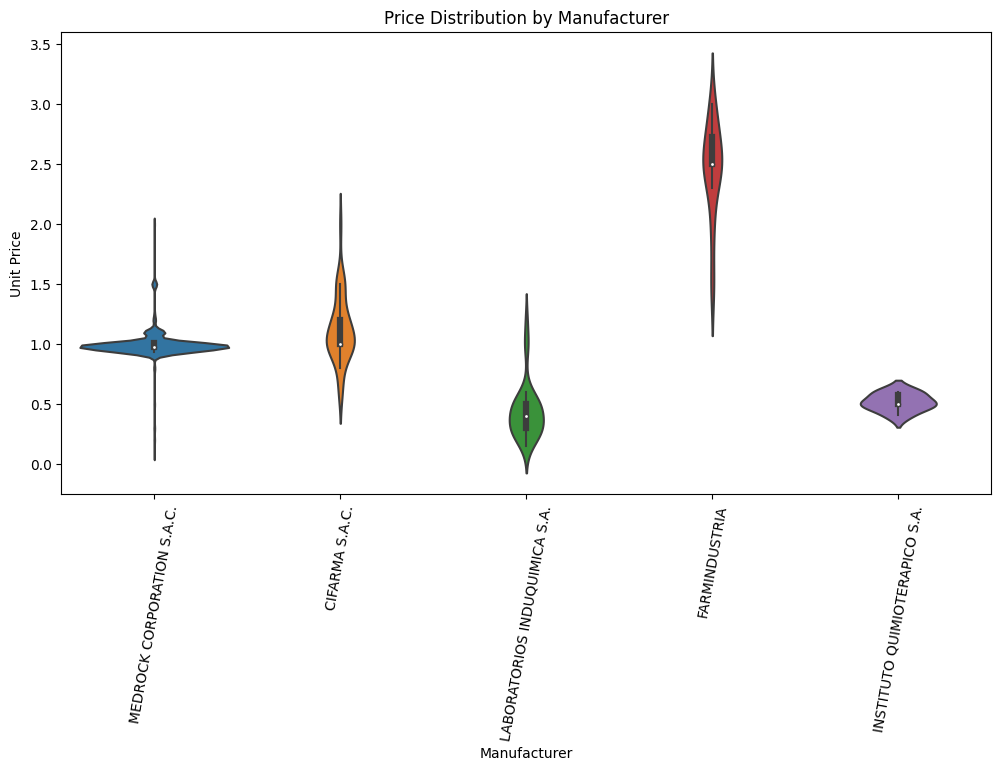

In [5]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Manufacturer', y='Unit Price', data=ibuprofen_data)
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=80)
plt.show()

# Heat map of unit prices by region and manufacturer

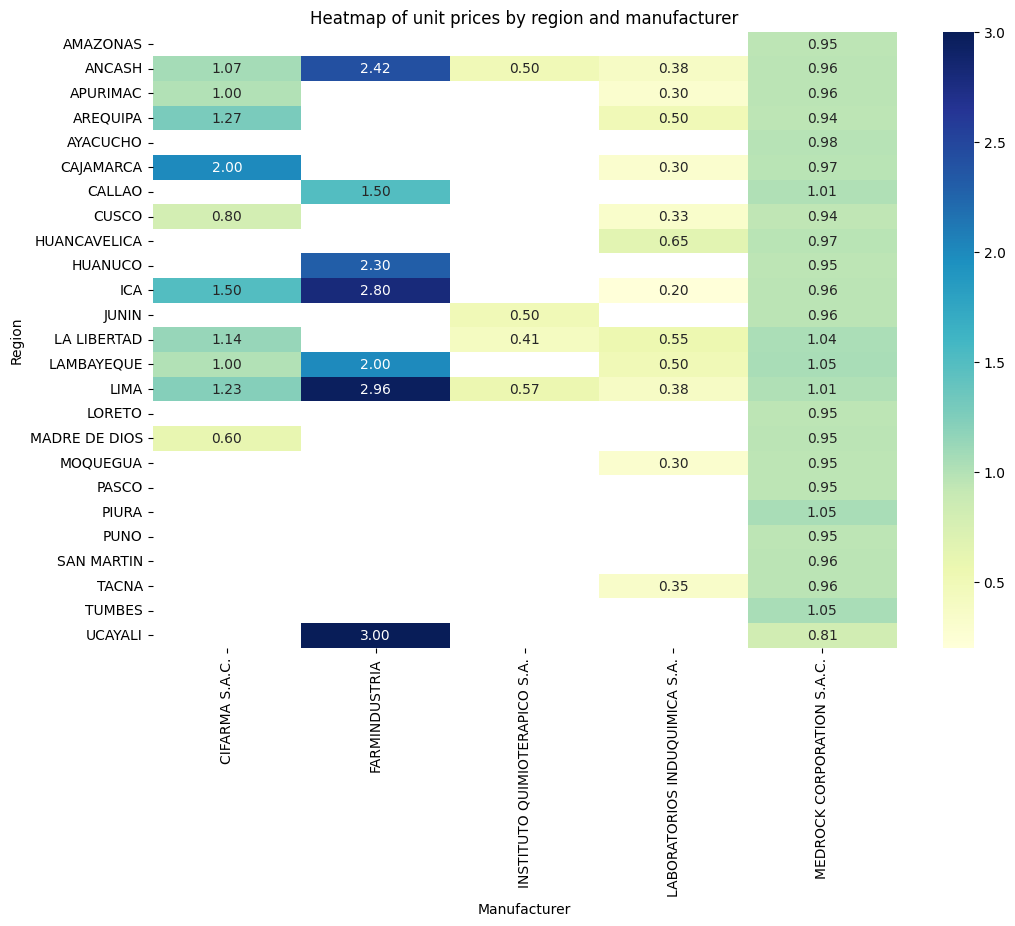

In [6]:

# Creando una tabla pivot
heatmap_data = ibuprofen_data.pivot_table(index='Region', columns='Manufacturer', values='Unit Price', aggfunc='mean')

# Crear el heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Heatmap of unit prices by region and manufacturer')
plt.show()


# Which ibuprofen manufacturer has the strongest presence in the country's regions?

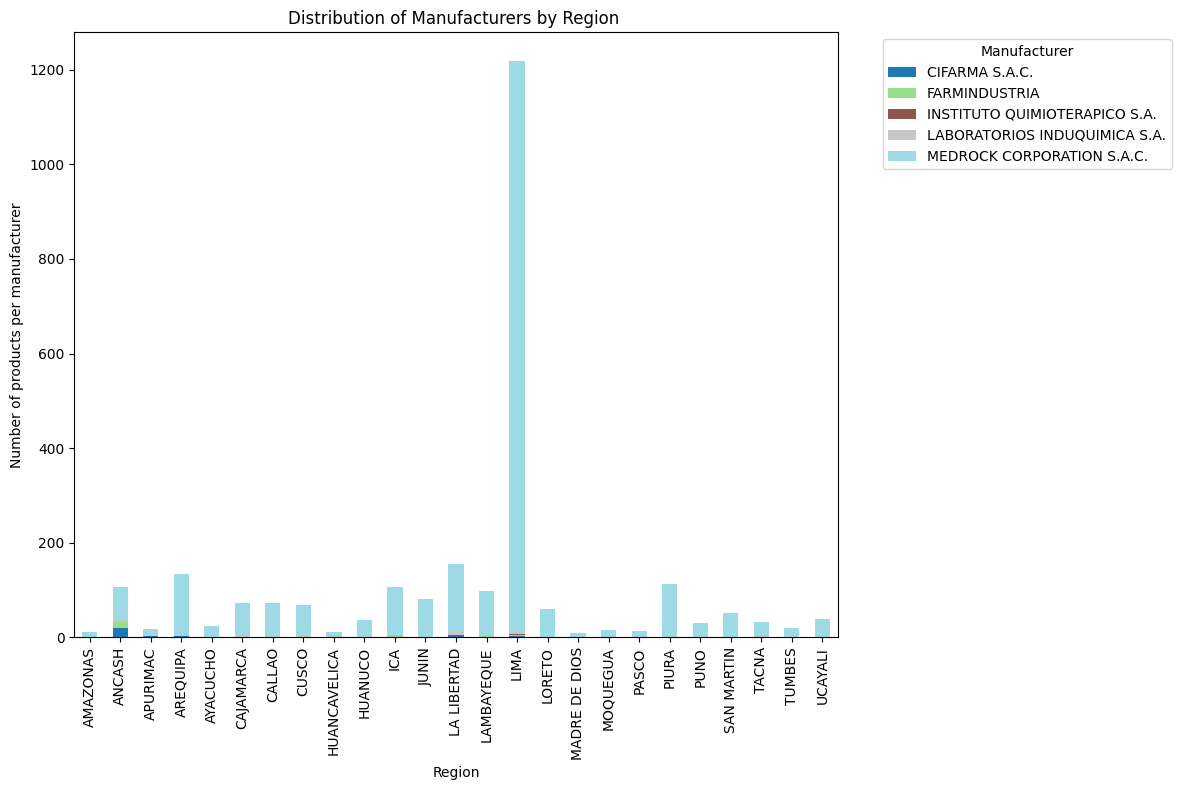

In [7]:

manufacturer_per_region.plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20')

plt.title('Distribution of Manufacturers by Region ')
plt.xlabel('Region')
plt.ylabel('Number of products per manufacturer')
plt.xticks(rotation=90)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust the chart so that it doesn't get cut off
plt.show()

# Unit Price per Product per Region per Date

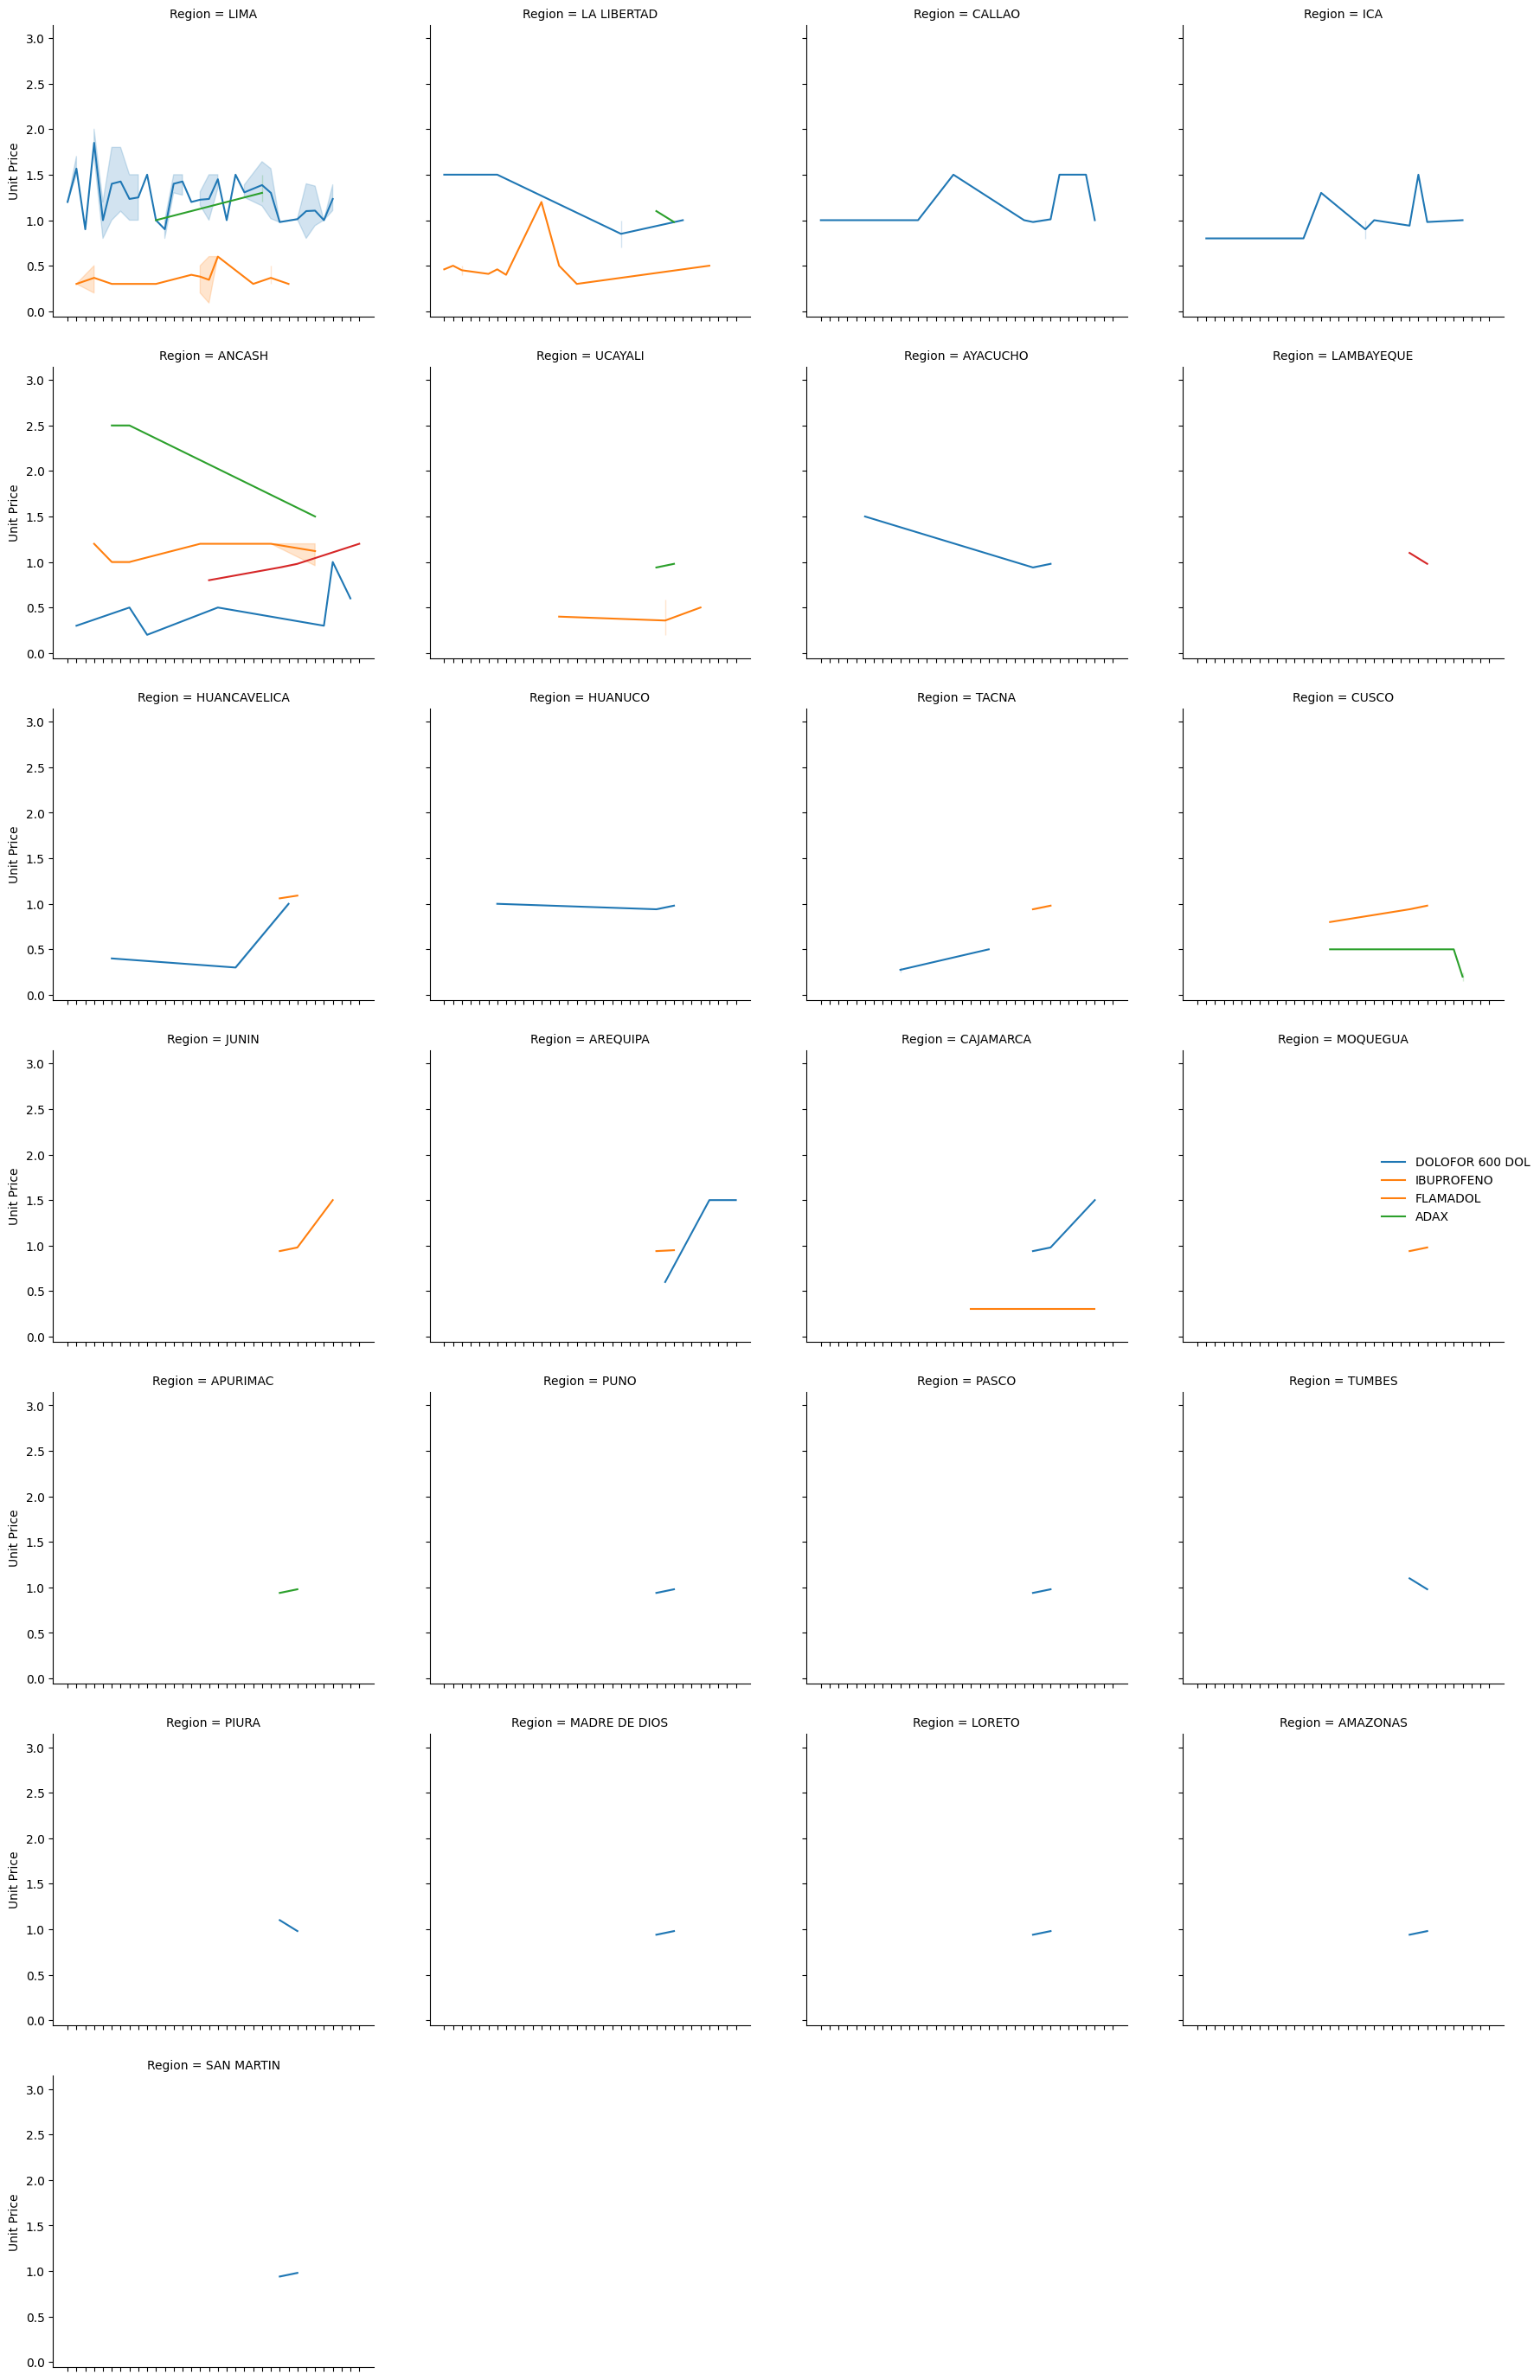

In [8]:
tm = sns.FacetGrid(ibuprofen_data, col="Region", col_wrap=4, height=4)
tm.map(sns.lineplot, "Date", "Unit Price", "Product")
tm.add_legend()
tm.fig.tight_layout()
for ax in tm.axes.flat:
    ax.set_xlabel('')
    ax.set_xticklabels([])
plt.show()

# Which pharmacies have the largest presence in Peru?

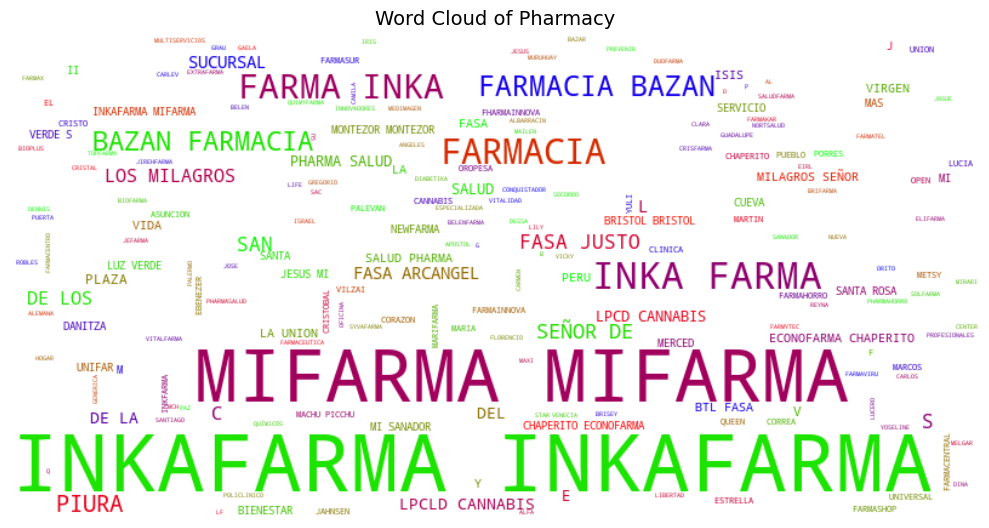

In [9]:
text = ' '.join(ibuprofen_data['Pharmacy'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='brg').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Pharmacy', fontsize=14)
plt.tight_layout()
plt.show()

# What is the average unit price of products nationwide?

Text(0, 0.5, 'Unit price')

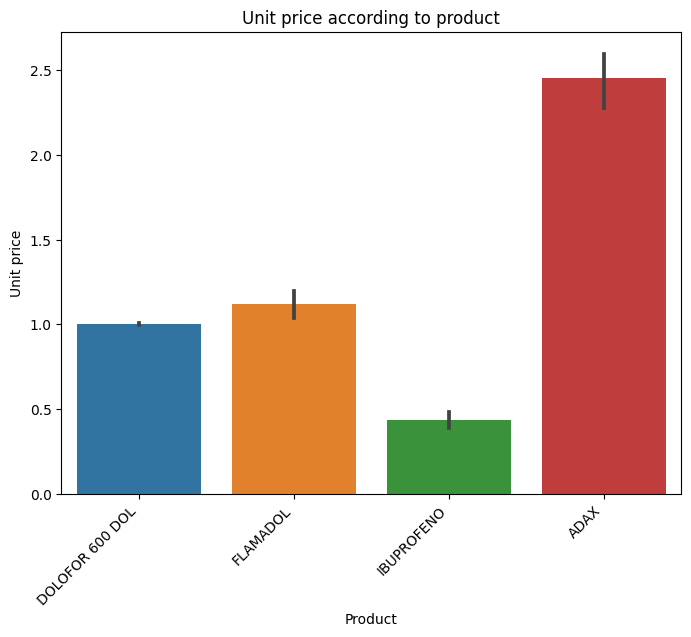

In [10]:
# Setting the graph size
plt.figure(figsize=(8,6))

# Adding title
plt.title("Unit price according to product")

# Setting data for bar chart
sns.barplot(x=ibuprofen_data['Product'], y=ibuprofen_data['Unit Price'])

# Rotating X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding subtitle to Y axis
plt.ylabel("Unit price")

# Which ibuprofen product has the most presence in Peru?

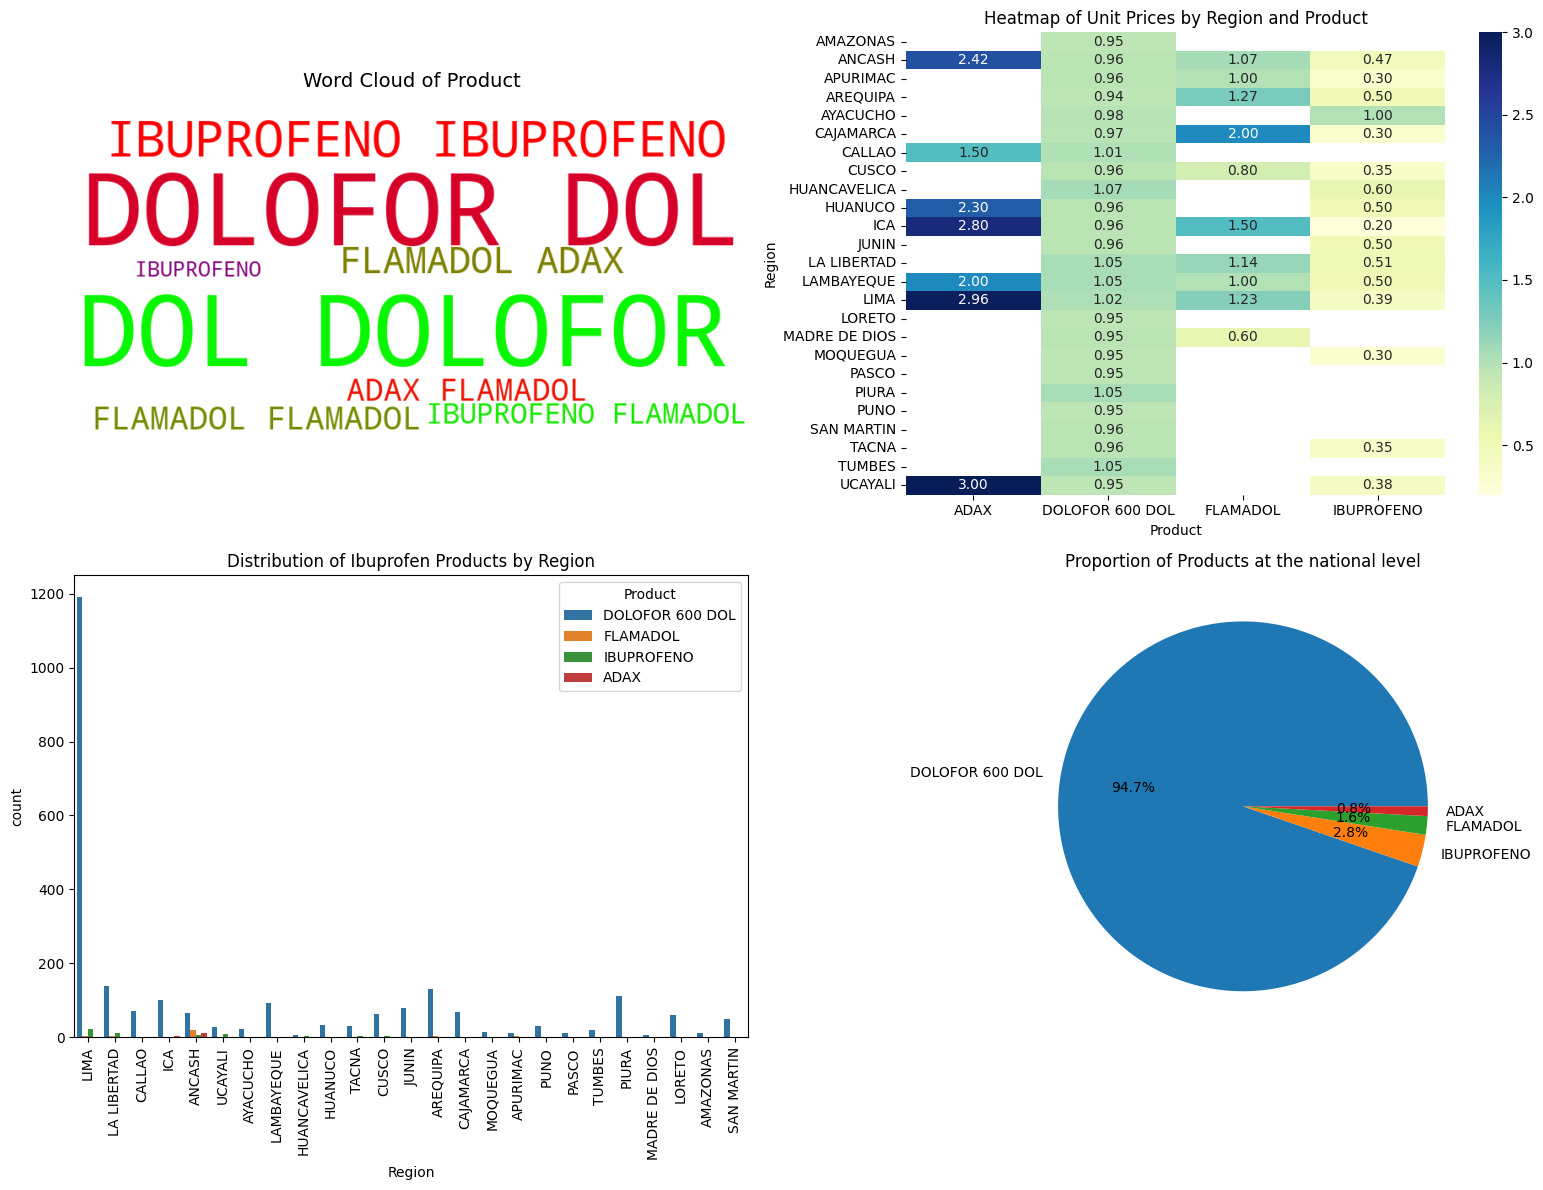

In [11]:

# Define the figure and the grid size.
plt.figure(figsize=(16, 12))

# First chart: Word Cloud
plt.subplot(2, 2, 1)
text = ' '.join(ibuprofen_data['Product'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='brg').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product', fontsize=14)

# Second chart: Heatmap of unit prices by region and product
plt.subplot(2, 2, 2)
heatmap_data = ibuprofen_data.pivot_table(index='Region', columns='Product', values='Unit Price', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Unit Prices by Region and Product')

# Third chart: Countplot of Distribution of Ibuprofen Products by Region
plt.subplot(2, 2, 3)
sns.countplot(x='Region', hue='Product', data=ibuprofen_data)
plt.title('Distribution of Ibuprofen Products by Region')
plt.xticks(rotation=90)

# Fourth chart: Pie chart of the Proportion of Products at the national level
plt.subplot(2, 2, 4)
ibuprofen_data['Product'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Products at the national level')
plt.ylabel('')

plt.tight_layout()
plt.show()
